In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('datasets/movies.csv')
ratings = pd.read_csv('datasets/ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [8]:
ratings['rating'].unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [10]:
user_num_ratings = ratings.groupby('userId')['rating'].count().reset_index()

In [11]:
user_num_ratings.head()

,userId,rating
0,1,70
1,2,184
2,3,656
3,4,242
4,5,101


In [12]:
user_num_ratings.rename(columns={'rating': 'user_num_ratings'}, inplace=True)

In [13]:
ratings = ratings.merge(user_num_ratings, on='userId')

In [14]:
ratings.head()

,userId,movieId,rating,timestamp,user_num_ratings
0,1,296,5.0,1147880044,70
1,1,306,3.5,1147868817,70
2,1,307,5.0,1147868828,70
3,1,665,5.0,1147878820,70
4,1,899,3.5,1147868510,70


<Axes: >

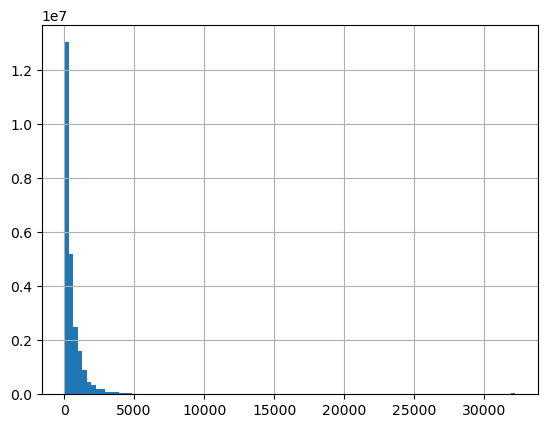

In [15]:
ratings['user_num_ratings'].hist(bins=100)

<Axes: >

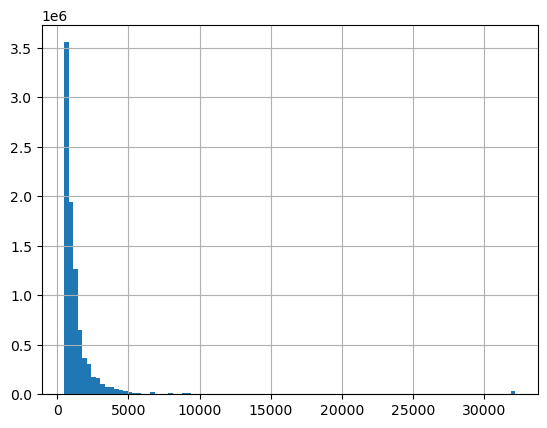

In [16]:
ratings[ratings['user_num_ratings']>500]['user_num_ratings'].hist(bins=100)

In [17]:
ratings = ratings[ratings['user_num_ratings']>500]

In [18]:
ratings.groupby('movieId')['rating'].count().sort_values(ascending=False)

movieId
2571      9025
356       8889
296       8683
1270      8562
260       8554
          ... 
117668       1
177505       1
145410       1
145412       1
209163       1
Name: rating, Length: 57585, dtype: int64

In [19]:
movie_num_ratings = ratings.groupby('movieId')['rating'].count().reset_index()

In [20]:
movie_num_ratings.head()

,movieId,rating
0,1,8078
1,2,5856
2,3,2278
3,4,628
4,5,2238


In [21]:
movie_num_ratings.rename(columns={'rating': 'movie_num_ratings'}, inplace=True)

In [22]:
ratings = ratings.merge(movie_num_ratings, on='movieId')

In [23]:
ratings.head()

,userId,movieId,rating,timestamp,user_num_ratings,movie_num_ratings
0,3,1,4.0,1439472215,656,8078
1,12,1,4.0,1167582601,736,8078
2,120,1,5.0,956264593,640,8078
3,166,1,4.0,942014736,611,8078
4,171,1,4.5,1074594380,671,8078


<Axes: >

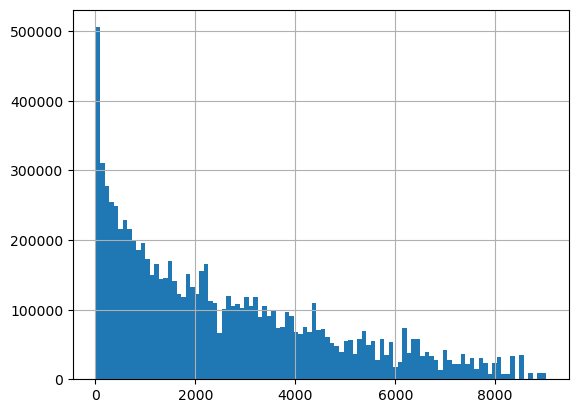

In [24]:
ratings['movie_num_ratings'].hist(bins=100)

<Axes: >

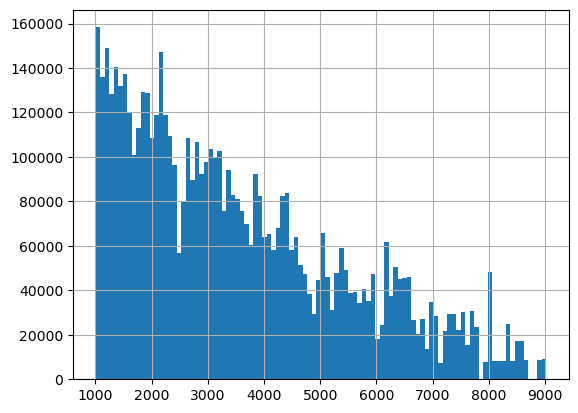

In [25]:
ratings[ratings['movie_num_ratings']>1000]['movie_num_ratings'].hist(bins=100)

In [26]:
ratings = ratings[ratings['movie_num_ratings']>1000]

In [27]:
ratings.shape

(6078281, 6)

In [28]:
ratings = ratings.merge(movies, on='movieId')

In [29]:
ratings.head()

,userId,movieId,rating,timestamp,user_num_ratings,movie_num_ratings,title,genres
0,3,1,4.0,1439472215,656,8078,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,12,1,4.0,1167582601,736,8078,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,120,1,5.0,956264593,640,8078,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,166,1,4.0,942014736,611,8078,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,171,1,4.5,1074594380,671,8078,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [30]:
# I will use this dataset for jenres in app instead of ratings dataset as it is too big
movies = movies[movies['movieId'].isin(ratings['movieId'].unique())]

In [31]:
movies['genres'] = movies['genres'].fillna('')
movies['genres'] = movies['genres'].str.split('|')
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(x))

In [32]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"Adventure, Animation, Children, Comedy, Fantasy"
1,2,Jumanji (1995),"Adventure, Children, Fantasy"
2,3,Grumpier Old Men (1995),"Comedy, Romance"
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),"Action, Crime, Thriller"


In [33]:
movie_pivot = pd.pivot_table(data=ratings, index='userId', columns='title', 
                             values='rating')

In [34]:
movie_pivot.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,3.5,NaN,NaN,NaN,3.5,NaN
12,NaN,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
72,3.0,NaN,NaN,5.0,NaN,NaN,3.0,5.0,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
80,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
120,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [35]:
# reset indexes for userId
movie_pivot = movie_pivot.reset_index().drop(columns=['userId'])

In [36]:
# People tend to give higher or lower ratings due to their preferences, in 
# that case we normalize data by extracting mean rating of each user from movie rating.

In [37]:
def normalizer(row):
    average = row.mean()
    return row - average
    
movie_norm = movie_pivot.apply(normalizer, axis=1)
movie_norm.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.274221,-0.225779,NaN,NaN,NaN,-0.225779,NaN
1,NaN,-0.378354,NaN,-0.378354,NaN,-2.378354,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121646
2,-0.429003,NaN,NaN,1.570997,NaN,NaN,-0.429003,1.570997,NaN,NaN,...,NaN,1.570997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.429003
3,NaN,NaN,NaN,1.388889,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.388889,NaN,NaN
4,NaN,NaN,NaN,0.721022,NaN,NaN,-0.278978,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.278978


In [38]:
# we are filling nan values with zeros as it needs for cosine similarity

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
user_sim = pd.DataFrame(cosine_similarity(movie_norm.fillna(0)))

In [41]:
user_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,9653,9654,9655,9656,9657,9658,9659,9660,9661,9662
0,1.000000,0.090537,0.079958,0.122410,0.078081,0.001493,0.137428,0.027540,0.173717,0.167365,...,0.096943,0.113847,0.102512,0.127180,0.114143,0.100759,0.034069,-0.022645,0.171308,0.099003
1,0.090537,1.000000,0.228354,0.087745,0.102377,0.106405,0.091109,0.094138,0.038438,0.046546,...,0.049921,0.196028,0.049663,0.139376,0.143571,0.172432,0.053770,-0.015201,0.153494,0.139726
2,0.079958,0.228354,1.000000,0.122666,0.172898,0.149590,0.097672,0.181445,0.049063,0.059361,...,0.093190,0.103452,0.085269,0.097941,0.132858,0.102715,0.073971,0.031024,0.140709,0.118569
3,0.122410,0.087745,0.122666,1.000000,0.085154,0.054679,0.116888,0.060703,0.066329,0.061671,...,0.070008,0.045338,0.055325,0.025656,0.069623,0.085164,0.118917,-0.002126,0.165646,0.122041
4,0.078081,0.102377,0.172898,0.085154,1.000000,0.124374,0.076486,0.069180,0.103281,0.015109,...,0.053178,0.088684,0.048513,0.071908,0.069597,0.085604,0.041275,0.026373,0.136365,0.139557


In [42]:
import pickle as pkl

In [43]:
pkl.dump(user_sim, open('files/user_similarity.pkl', 'wb'))
movies.to_csv('files/movies.csv', index=False)
movie_norm.to_csv('files/movie_pivot_normalized.csv', index=False)

In [44]:
len(user_sim.columns)

9663

In [45]:
picked_userid = 0

# Remove picked user ID from the candidate list
user_sim.drop(index=picked_userid, inplace=True)

user_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,9653,9654,9655,9656,9657,9658,9659,9660,9661,9662
1,0.090537,1.000000,0.228354,0.087745,0.102377,0.106405,0.091109,0.094138,0.038438,0.046546,...,0.049921,0.196028,0.049663,0.139376,0.143571,0.172432,0.053770,-0.015201,0.153494,0.139726
2,0.079958,0.228354,1.000000,0.122666,0.172898,0.149590,0.097672,0.181445,0.049063,0.059361,...,0.093190,0.103452,0.085269,0.097941,0.132858,0.102715,0.073971,0.031024,0.140709,0.118569
3,0.122410,0.087745,0.122666,1.000000,0.085154,0.054679,0.116888,0.060703,0.066329,0.061671,...,0.070008,0.045338,0.055325,0.025656,0.069623,0.085164,0.118917,-0.002126,0.165646,0.122041
4,0.078081,0.102377,0.172898,0.085154,1.000000,0.124374,0.076486,0.069180,0.103281,0.015109,...,0.053178,0.088684,0.048513,0.071908,0.069597,0.085604,0.041275,0.026373,0.136365,0.139557
5,0.001493,0.106405,0.149590,0.054679,0.124374,1.000000,0.018925,0.105402,-0.019927,-0.005507,...,-0.005994,-0.014645,0.043477,0.052149,-0.009254,0.104042,0.057757,0.020790,0.061337,0.049483


In [46]:
# The user-based collaborative filtering makes recommendations based on users with similar tastes, 
# so we need to set a positive threshold. Here we set the user_similarity_threshold to be 0.2,
# meaning that user must have a cosine similarity coefficient of at least 0.2 to be considered 
# as a similar user.

In [47]:
# User similarty threshold
user_sim_thresh = 0.2

# Get top n similar users
similar_users = user_sim[user_sim[picked_userid]>user_sim_thresh][picked_userid]\
    .sort_values(ascending=False)[:10]

print('Similar users:')
print(similar_users)

Similar users:
5550    0.335622
45      0.331724
7211    0.327038
992     0.318052
8654    0.317591
8456    0.317487
6622    0.316744
3193    0.314429
1302    0.312800
9147    0.311930
Name: 0, dtype: float64


In [48]:
movie_norm[movie_norm.index==0]

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.274221,-0.225779,NaN,NaN,NaN,-0.225779,NaN


In [49]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = movie_norm[movie_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')

In [50]:
similar_user_movies

title,(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),[REC] (2007),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
45,-0.023933,0.476067,NaN,NaN,NaN,NaN,0.976067,0.976067,-0.023933,NaN,...,-0.523933,-0.023933,0.476067,-0.523933,0.476067,-0.023933,NaN,-0.023933,-0.023933,NaN
992,0.581705,0.081705,NaN,NaN,NaN,NaN,1.081705,NaN,NaN,NaN,...,NaN,NaN,0.581705,-0.418295,0.081705,NaN,NaN,NaN,-0.918295,NaN
1302,0.325029,0.825029,0.325029,-1.674971,NaN,NaN,1.825029,0.825029,0.325029,-1.174971,...,-1.174971,0.825029,1.325029,0.325029,NaN,0.325029,NaN,NaN,-1.674971,NaN
3193,0.065195,1.065195,-0.434805,NaN,NaN,NaN,NaN,NaN,NaN,-0.934805,...,-0.434805,NaN,NaN,0.565195,NaN,0.065195,1.065195,NaN,-0.934805,NaN
5550,-0.180233,0.319767,NaN,-0.680233,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.180233,NaN,-0.180233,NaN,NaN,NaN,-0.180233,NaN
6622,0.677736,0.177736,-0.322264,-1.322264,-0.822264,NaN,1.177736,0.677736,0.677736,NaN,...,-0.322264,0.177736,0.677736,0.177736,NaN,0.677736,0.177736,NaN,-0.822264,-0.822264
7211,1.213216,-0.286784,-0.286784,NaN,-0.286784,0.213216,NaN,1.213216,0.213216,-0.786784,...,-0.786784,0.713216,NaN,-0.286784,0.213216,-0.286784,0.213216,-0.286784,-0.286784,-0.286784
8456,0.734855,-0.265145,-0.765145,NaN,-2.265145,-0.265145,1.734855,0.734855,0.234855,NaN,...,-0.765145,0.734855,1.234855,0.234855,-0.765145,0.234855,0.234855,0.234855,NaN,NaN
8654,-1.060000,0.940000,-0.560000,NaN,NaN,NaN,NaN,-0.560000,NaN,NaN,...,-1.060000,NaN,0.940000,NaN,-1.560000,1.940000,NaN,NaN,-2.560000,NaN
9147,NaN,-0.270933,-0.770933,NaN,-0.770933,-0.270933,1.229067,0.229067,0.229067,NaN,...,-0.270933,0.229067,0.729067,NaN,-0.270933,NaN,0.729067,NaN,-1.770933,NaN


In [51]:
# Movies that the target user has watched
# how='all' parameter means it’s only dropping columns where all values are NaN.
picked_userid_watched = movie_norm[movie_norm.index==0].dropna(axis=1, how='all')

In [52]:
picked_userid_watched

title,"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2001: A Space Odyssey (1968),2012 (2009),22 Jump Street (2014),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),300 (2007),3:10 to Yuma (2007),...,X-Men Origins: Wolverine (2009),X-Men: Apocalypse (2016),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),You Don't Mess with the Zohan (2008),Zombieland (2009),Zoolander (2001),xXx (2002)
0,0.274221,1.274221,-1.225779,-0.725779,0.774221,-0.725779,-0.725779,-0.725779,0.274221,0.274221,...,0.274221,-0.225779,0.274221,0.274221,0.274221,0.274221,-0.725779,0.274221,-0.225779,-0.225779


In [53]:
# Remove movies that target user watched
similar_user_movies.drop(columns=picked_userid_watched.columns, errors='ignore', inplace=True)

In [54]:
similar_user_movies

title,(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),...,Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zodiac (2007),Zootopia (2016),[REC] (2007),eXistenZ (1999),¡Three Amigos! (1986)
45,-0.023933,0.476067,NaN,NaN,NaN,NaN,0.976067,0.976067,-0.023933,NaN,...,0.976067,NaN,NaN,-0.523933,-0.023933,0.476067,-0.023933,NaN,-0.023933,NaN
992,0.581705,0.081705,NaN,NaN,NaN,NaN,1.081705,NaN,NaN,NaN,...,0.581705,NaN,NaN,NaN,NaN,0.581705,NaN,NaN,NaN,NaN
1302,0.325029,0.825029,0.325029,-1.674971,NaN,NaN,1.825029,0.825029,0.325029,-1.174971,...,NaN,NaN,NaN,-1.174971,0.825029,1.325029,0.325029,NaN,NaN,NaN
3193,0.065195,1.065195,-0.434805,NaN,NaN,NaN,NaN,NaN,NaN,-0.934805,...,NaN,NaN,0.565195,-0.434805,NaN,NaN,0.065195,1.065195,NaN,NaN
5550,-0.180233,0.319767,NaN,-0.680233,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.180233,NaN,NaN,NaN,NaN
6622,0.677736,0.177736,-0.322264,-1.322264,-0.822264,NaN,1.177736,0.677736,0.677736,NaN,...,1.177736,-0.822264,1.177736,-0.322264,0.177736,0.677736,0.677736,0.177736,NaN,-0.822264
7211,1.213216,-0.286784,-0.286784,NaN,-0.286784,0.213216,NaN,1.213216,0.213216,-0.786784,...,NaN,-0.786784,NaN,-0.786784,0.713216,NaN,-0.286784,0.213216,-0.286784,-0.286784
8456,0.734855,-0.265145,-0.765145,NaN,-2.265145,-0.265145,1.734855,0.734855,0.234855,NaN,...,0.734855,NaN,0.734855,-0.765145,0.734855,1.234855,0.234855,0.234855,0.234855,NaN
8654,-1.060000,0.940000,-0.560000,NaN,NaN,NaN,NaN,-0.560000,NaN,NaN,...,NaN,NaN,1.440000,-1.060000,NaN,0.940000,1.940000,NaN,NaN,NaN
9147,NaN,-0.270933,-0.770933,NaN,-0.770933,-0.270933,1.229067,0.229067,0.229067,NaN,...,NaN,-0.770933,NaN,-0.270933,0.229067,0.729067,NaN,0.729067,NaN,NaN


In [55]:
# # A dictionary to store item scores
# item_score = {}

# # Loop through items
# for i in similar_user_movies.columns:
#     # Get the ratings for movie i
#     movie_rating = similar_user_movies[i]
#     # Create a variable to stor the score
#     total = 0
#     # variable to store the number of scores
#     count = 0
#     for u in similar_users.index:
#         # If the movie has rating
#         if pd.isna(movie_rating[u]) == False:
#             # Score is the sum of user similarity score multiply by the movie rating
#             score = similar_users[u] * movie_rating[u]
#             # Add the score to the total score for the movie so far
#             total += score
#             # Add 1 to the count
#             count += 1
#     # Get the average score for the item 
#     item_score[i] = total/count

# # Convert dictionary to pandas dataframe
# item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# # Sort the movies by score
# ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# # Select top m movies
# m = 10
# ranked_item_score.head(m)

In [56]:
# Get top 10 movies to recommend for target user
movies_scores = similar_user_movies.mean(axis=0).sort_values(ascending=False)[:10]
movies_to_recommend = movies_scores.index.to_list()

In [57]:
movies[movies['title'].isin(movies_to_recommend)]['genres'].to_list()

['Drama',
 'Drama, Mystery, Romance, Thriller',
 'Film-Noir, Mystery, Thriller',
 'Drama, Fantasy',
 'Drama, Romance',
 'Crime, Drama',
 'Comedy, Crime, Drama',
 'Drama, Romance',
 'Adventure, Animation, Fantasy',
 'Drama, Romance']